In [1]:
!python --version

Python 3.9.7


#### 파이썬 코코 데이터셋 load(Linux, Window 구분)

#### linux
#### !pip install "git+https://github.com/philferriere/cocoapi.git#egg=pycocotools&subdirectory=PythonAPI"
#### window
#### !pip install pycocotools-windows

## 주석

In [2]:
from pycocotools.coco import COCO
import os
import numpy as np
import cv2
import PIL.Image as Image
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pycocotools'

In [ ]:
import tensorflow as tf

In [4]:
print(tf.__version__)

2.5.0


In [5]:
dataDir = '../coco'
annVal = os.path.join(dataDir, 'annotations' ,'instances_val2017.json')

In [6]:
coco = COCO(annVal)
print(coco)

loading annotations into memory...
Done (t=0.52s)
creating index...
index created!


In [7]:
idx_nm = 1000

In [8]:
img_id = coco.getImgIds()[idx_nm]

In [9]:
img_info = coco.loadImgs(img_id)[0]

In [10]:
img_info

{'license': 1,
 'file_name': '000000010363.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000010363.jpg',
 'height': 361,
 'width': 640,
 'date_captured': '2013-11-15 07:08:52',
 'flickr_url': 'http://farm4.staticflickr.com/3027/2477308902_443e5baf08_z.jpg',
 'id': 10363}

In [11]:
img = cv2.imread(os.path.join(dataDir, 'val2017', img_info['file_name']))

In [12]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [13]:
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
ss_tmp = ss.process()

In [14]:
ss_tmp = ss_tmp[:2000]

In [15]:
ss_tmp

array([[  0,  40, 191, 256],
       [153, 304,  55,  57],
       [421,  92,  68,  39],
       ...,
       [  0,  29, 285, 290],
       [272, 166, 194, 195],
       [ 95,   0, 137,  65]])

In [18]:
print(len(ssresults))

2383


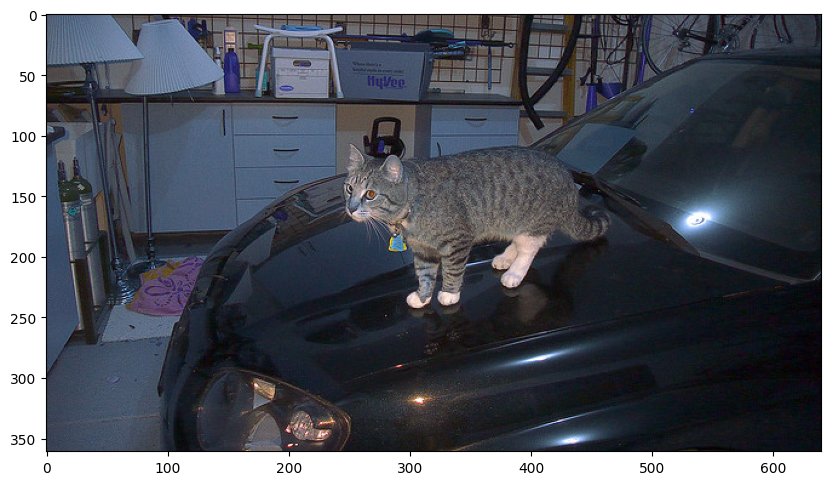

In [60]:
plt.figure(figsize = (10,10))
plt.imshow(img)

In [61]:
import selectivesearch

In [66]:
_, regions = selectivesearch.selective_search(img, scale=100, min_size=2000)

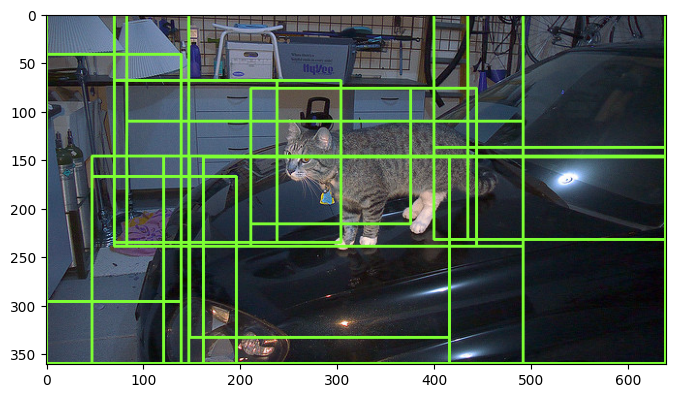

In [70]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 10000] # rects만 가져와서 저장

green_rgb = (125,255,51)
img_cp = img.copy() # 그림 카피 뜨기

for rect in cand_rects:
    left=rect[0]
    top=rect[1]

    right = left + rect[2]
    bottom = top + rect[3]

    img_cp = cv2.rectangle(img_cp, (left,top),(right,bottom),color=green_rgb, thickness=2) 
    #사각형 좌표의 왼쪽 상단, 오른쪽 하단 입력

plt.figure(figsize=(8,8))
plt.imshow(img_cp)
plt.show()